# Gradient Descent and Cost Function (concept behind lm)

## ie4

In [5]:
import numpy as np
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.02
    for i in range(iterations):
        y_predicted = m_curr + x * b_curr
        cost = (1/n) * sum([val ** 2 for val in (y-y_predicted)]) # math.sqrt((1/n) * sum([val ** 2 for val in (y-y_predicted)]))
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n) * sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradient_descent(x,y)

m 1.24, b 0.36, cost 89.0, iteration 0
m 2.1728, b 0.6272, cost 50.0016, iteration 1
m 2.8760960000000004, b 0.825024, cost 28.228119040000003, iteration 2
m 3.4079539200000006, b 0.9709772799999999, cost 16.075112165375998, iteration 3
m 3.8117694464000005, b 1.0781418496, cost 9.29542862752317, iteration 4
m 4.119974699008001, b 1.1562940497919998, cost 5.516998895699345, iteration 5
m 4.356808353218561, b 1.2127397758566398, cost 3.4150044551855068, iteration 6
m 4.540385849455412, b 1.2529386686251005, cost 2.249526683417887, iteration 7
m 4.684246533325719, b 1.2809705944118719, cost 1.607319305243188, iteration 8
m 4.798509887785409, b 1.2998842617494186, cost 1.2575858297979448, iteration 9


## asgn4

m 1.9783600000000003, b 0.027960000000000002, cost 5199.1, iteration 0
m 0.20975041279999962, b 0.0030470367999999894, cost 4161.482445460163, iteration 1
m 1.7908456142986242, b 0.025401286955264, cost 3332.2237319269248, iteration 2
m 0.37738163667530467, b 0.005499731626422651, cost 2669.4843523161976, iteration 3
m 1.6409848166378898, b 0.023373894401807944, cost 2139.826383775145, iteration 4
m 0.5113514173939655, b 0.0074774305434828076, cost 1716.5264071567592, iteration 5
m 1.5212165764726306, b 0.021771129698498662, cost 1378.2272007804495, iteration 6
m 0.6184191426785134, b 0.009075514323270572, cost 1107.8601808918404, iteration 7
m 1.4254981563597626, b 0.020507724625171385, cost 891.7842215178443, iteration 8
m 0.7039868810749315, b 0.010370210797388455, cost 719.0974036421305, iteration 9
m 1.3490002310389348, b 0.01951553325074733, cost 581.0869686205, iteration 10
m 0.7723719384951477, b 0.01142244086408669, cost 470.7897237271261, iteration 11
m 1.2878632281408475, b 

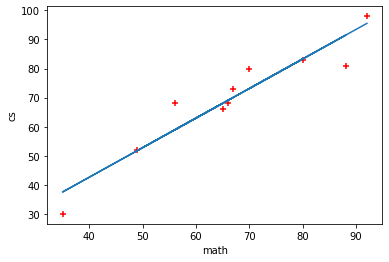

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
# lm with sklearn
def predict_using_sklean():
    test_scores = pd.read_csv("test_scores.csv")
    reg = linear_model.LinearRegression()
    reg.fit(test_scores[["math"]], test_scores.cs)
    # plt
    %matplotlib inline
    plt.xlabel("math")
    plt.ylabel("cs")
    plt.scatter(test_scores.math, test_scores.cs, color = "red", marker = "+")
    plt.plot(test_scores.math, reg.predict(test_scores[["math"]]))
    return reg.coef_,reg.intercept_
# lm with gradient descent
def gradient_descent(x, y):
    m_curr = 0
    b_curr = 0
    iterations = 100
    n = len(x)
    learning_rate = 0.0002
    cost_prev = 0
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n) * sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_prev, rel_tol=1e-7):
            break
        cost_prev = cost
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))
    return m_curr, b_curr
if __name__ == "__main__":
    test_scores = pd.read_csv("test_scores.csv")
    x = np.array(test_scores.math)
    y = np.array(test_scores.cs)
    # lm with gradient descent
    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))
    # lm with sklearn
    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(float(m_sklearn),float(b_sklearn)))